In [12]:
import pandas as pd
import matplotlib.pyplot as plt

SESSION = ['1.txt', '2.txt', '3.txt', '4.txt', '5.txt']
COLUMNS = ["NaN", "NaN.1", "NaN.2", "NaN.3", "NaN.4", "NaN.5", "NaN.6",
           "NaN.7", "NaN.8", "NaN.9", "NaN.10", "NaN.11", "NaN.12"]
MOVEMENT_THRESHOLD = 10000
FORCE_THRESHOLD = 10000

In [168]:
#Function "setupTxt" 
#Replaces all the blankspaces with commas, then adds column names
def insert_comma():
    for i in range(0, 5):
        with open(SESSION[i], 'r') as data:
            txt = data.read()
        txt = txt.replace(' ', ',')

        with open (SESSION[i], 'w') as add_col:
            add_col.write('time,acc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,force,NaN,NaN,NaN,NaN,NaN\n')

        with open(SESSION[i], 'a') as replace:
            replace.write(txt)


def increment_index(indexCounter, movement_lst):
    for ix in range(0, 1000):
        if movement_lst[ix] < 8500:
            #print(movement_lst[ix])
            #print(indexCounter)
            return indexCounter + 20
        indexCounter += 1  

#Function "getImpulse"
#arg: lists[4]
#return: list
def getImpulse(time, force):
    impulse = []
    return_impulse = 0
    for ix in range(0, 5):
        impulse.append(force[ix] * time[ix])
    return impulse
    
#Function "getNewtonValue"
#arg: list[4]
#return: list 
def getNewtonValue(min_force, max_force):
    force = 0
    total_force = []
    newton_force = []
    percentage = 0
    
    for ix in range(0, 5):
        force = min_force[ix] + max_force[ix]
        total_force.append(force / 2)
    
    for ixx in range(0, 5):
        percentage = total_force[ixx]
        percentage = percentage / 16384
        newton_force.append(percentage * 98)
    return newton_force

#Function "getTime"
#arg: list[4]
#return: list
def getTime(t1, t2):
    time = []
    for ix in range(0, 5):
        time.append((t2[ix]/1000) - (t1[ix]/1000))
    return time
 
#Function "moveIx"
#arg: pandas Dataframe
#return: int 
def moveIx(session):
    move_lst = session['acc'].tolist()
    value = 0
    highestValue = 0
    for ix in range(0, len(move_lst)):
        value = move_lst[ix]
        if value > highestValue:
            highestValue = value
    return highestValue

#Function "forceIx"
#arg: pandas Dataframe
#return: int
def forceIx(session):
    force_lst = session['force'].tolist()
    value = 0
    highestValue = 0
    for ix in range(0, len(force_lst)):
        value = force_lst[ix]
        if value > highestValue:
            highestValue = value
    return highestValue    
    
    
def main_fn(session, MOVEMENT, FORCE):
    force_lst = session['force'].tolist()
    move_lst = session['acc'].tolist()
    time_lst = session['time'].tolist()
   
    #just for testing purposes brlow
    average_movement = 0
    for i in range(0, len(move_lst)):
        average_movement += move_lst[i]
    average_movement = average_movement / (len(move_lst))
    print("medevärde på movement", average_movement)
    
    average_force = 0
    for i in range(0, len(force_lst)):
        average_force += force_lst[i]
    average_force = average_force / (len(move_lst))
    print("medevärde på force", average_force) 
    
    MAX_INDEX, MIN_INDEX = [], []
    indexCnt = 0
    for ix in range(indexCnt, len(move_lst)-1):
        if move_lst[ix] < average_movement - 1000 and get_max(ix, force_lst) > average_force + 1000:
            MAX_INDEX.append(get_max(ix, force_lst))
            MIN_INDEX.append(get_min(ix, force_lst))
            indexCnt = ix
            break 
    print(indexCnt)
    indexCnt += 100
    for ix in range(indexCnt, len(move_lst)-1):
        if move_lst[ix] < average_movement - 1000 and get_max(ix, force_lst) > average_force + 1000:
            MAX_INDEX.append(get_max(ix, force_lst))
            MIN_INDEX.append(get_min(ix, force_lst))
            indexCnt = ix
            break    
    print(indexCnt)
    indexCnt += 100
    for ix in range(indexCnt, len(move_lst)-1): 
        if move_lst[ix] < average_movement - 1000 and get_max(ix, force_lst) > average_force + 1000:
            MAX_INDEX.append(get_max(ix, force_lst))
            MIN_INDEX.append(get_min(ix, force_lst))
            indexCnt = ix
            break 
    print(indexCnt)
    indexCnt += 100
    for ix in range(indexCnt, len(move_lst)-1):
        if move_lst[ix] < average_movement - 1000 and get_max(ix, force_lst) > average_force + 1000:
            MAX_INDEX.append(get_max(ix, force_lst))
            MIN_INDEX.append(get_min(ix, force_lst))
            indexCnt = ix
            break  
    print(indexCnt)
    indexCnt += 100
    for ix in range(indexCnt, len(move_lst)-1):
        if move_lst[ix] < average_movement - 1000 and get_max(ix, force_lst) > average_force + 1000:
            MAX_INDEX.append(get_max(ix, force_lst))
            MIN_INDEX.append(get_min(ix, force_lst))
            indexCnt = ix
            break 
    FORCE_min, FORCE_max = [], []
    t_1, t_2= [], []
   
    print("Max index", MAX_INDEX)
    print("Min index", MIN_INDEX)
    for ixx in range(0, 5):
        FORCE_min.append(force_lst[MIN_INDEX[ixx]])
        t_1.append(time_lst[MIN_INDEX[ixx]])
        FORCE_max.append(force_lst[MAX_INDEX[ixx]])
        t_2.append(time_lst[MAX_INDEX[ixx]])
   
    Favg = get_newtonValue(FORCE_min, FORCE_max)
    Time = get_time(t_1, t_2)
    impulse = get_impulse(Time, Favg)
   
    impulse_return = 0
    for ixx in range(0, 5):
        impulse_return += impulse[ixx]
    impulse_return = impulse_return / 5
    return int(impulse_return)
 
def get_max(ix, force_lst):
    index_max = 0
    for ixx in range(100, 0, -1):
        if force_lst[ixx] > force_lst[ix]:
            index_max = ixx
    for ixx in range(100, 0):
        if force_lst[ixx] > force_lst[ix]:
            index_max = ixx
    if index_max == 0:
        return ix
    else:
        return index_max
    
def get_min(ix, force_lst):
    index_min = 0
    for ixx in range(ix, 0, -1):
        if force_lst[ixx] < force_lst[ix] / 2:
            for ixxx in range(ixx, 0, -1):
                if force_lst[ixxx] > force_lst[ixx] or force_lst[ixxx] < 50:
                    return ixxx

C:\Users\Brockzter\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Brockzter\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


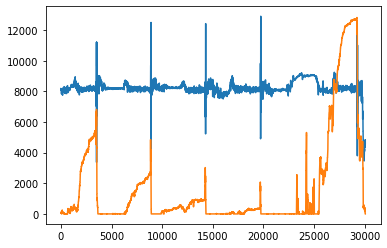

C:\Users\Brockzter\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Brockzter\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


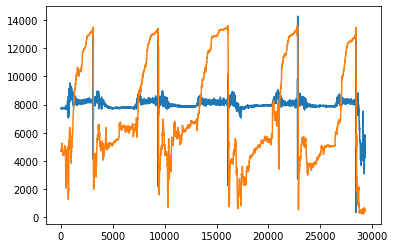

C:\Users\Brockzter\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Brockzter\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


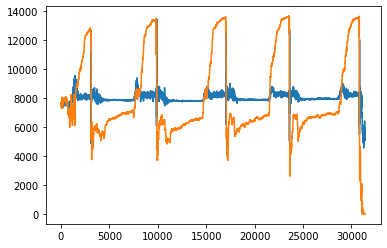

C:\Users\Brockzter\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Brockzter\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


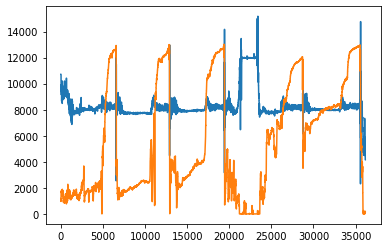

C:\Users\Brockzter\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Brockzter\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


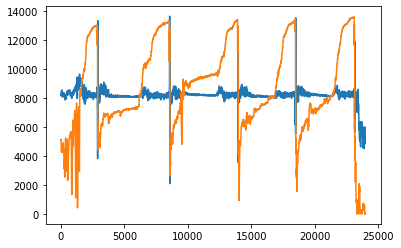

In [59]:
#Insert comma into text file. RUN ONLY ONCE comment this function out after the first run.
#insert_comma()

#Convert the new csv files to pd dataframes
session1 = pd.read_csv(SESSION[0])
session2 = pd.read_csv(SESSION[1])
session3 = pd.read_csv(SESSION[2])
session4 = pd.read_csv(SESSION[3])
session5 = pd.read_csv(SESSION[4])

#Remove excess columns
session1 = session1.drop(columns=COLUMNS)
session2 = session2.drop(columns=COLUMNS)
session3 = session3.drop(columns=COLUMNS)
session4 = session4.drop(columns=COLUMNS)
session5 = session5.drop(columns=COLUMNS)

#Plot sessions
plot(session1)
plt.show()

plot(session2)
plt.show()

plot(session3)
plt.show()

plot(session4)
plt.show()

plot(session5)
plt.show()

In [170]:
print("**************** IMPULSE 1 ****************")
MOVEMENT_THRESHOLD = moveIx(session1)
FORCE_THRESHOLD = forceIx(session1)
#print("mov",MOVEMENT_THRESHOLD)
#print("for",FORCE_THRESHOLD)
imp1 = main_fn(session1, MOVEMENT_THRESHOLD, FORCE_THRESHOLD)

print(imp1)

print("**************** IMPULSE 2 ****************")
MOVEMENT_THRESHOLD = moveIx(session2)
FORCE_THRESHOLD = forceIx(session2)
imp2 = main_fn(session2, MOVEMENT_THRESHOLD, FORCE_THRESHOLD)

print(imp2)

print("**************** IMPULSE 3 ****************")
MOVEMENT_THRESHOLD = moveIx(session3)
FORCE_THRESHOLD = forceIx(session3)
imp3 = main_fn(session3, MOVEMENT_THRESHOLD, FORCE_THRESHOLD)

print(imp3)

print("**************** IMPULSE 4 ****************")
MOVEMENT_THRESHOLD = moveIx(session4)
FORCE_THRESHOLD = forceIx(session4)
imp4 = main_fn(session4, MOVEMENT_THRESHOLD, FORCE_THRESHOLD)

print(imp4)

print("**************** IMPULSE 5 ****************")
MOVEMENT_THRESHOLD = moveIx(session5)
FORCE_THRESHOLD = forceIx(session5)
imp5 = main_fn(session5, MOVEMENT_THRESHOLD, FORCE_THRESHOLD)

print(imp5)


# with open(PARTICIPANT, 'w') as txt:
#     txt.write(str(imp1))
#     txt.write(", ")
#     txt.write(str(imp2))
#     txt.write(", ")
#     txt.write(str(imp3))
#     txt.write(", ")
#     txt.write(str(imp4))
#     txt.write(", ")
#     txt.write(str(imp5))

**************** IMPULSE 1 ****************
medevärde på movement 8208.728645054032
medevärde på force 1700.3406151288445
3499
8878
14269
19720
Max index [3499, 8878, 14269, 19720, 29281]
Min index [919, 6388, 10192, 18127, 26797]
169
**************** IMPULSE 2 ****************
medevärde på movement 7993.465169381773
medevärde på force 7229.4518437734305
9359
16103
22814
28427
Max index [9359, 16103, 22814, 28427]
Min index [7301, 13124, 20969, 26732]


IndexError: list index out of range